In [9]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [10]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [11]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [12]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [13]:
import yfinance as yf

# Descargar los datos de Tesla
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reiniciar el índice del DataFrame
tesla_data.reset_index(inplace=True)

# Mostrar las primeras cinco filas
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [14]:
import requests

# URL de la página web
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Realizar la solicitud GET
response = requests.get(url)

# Guardar el texto de la respuesta en una variable
html_data = response.text

# Mostrar los primeros 500 caracteres para verificar
print(html_data[:500])



<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
	


In [15]:
from bs4 import BeautifulSoup

# Analizar los datos HTML con BeautifulSoup usando el analizador html.parser
soup = BeautifulSoup(html_data, 'html.parser')

# Opcional: Si prefieres usar html5lib
# soup = BeautifulSoup(html_data, 'html5lib')

# Mostrar los primeros elementos del contenido analizado para verificar
print(soup.prettify()[:500])


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
  <title>
   Te


In [16]:
import pandas as pd
from bs4 import BeautifulSoup

# Analizar los datos HTML con BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Encontrar la tabla en el HTML
table = soup.find('table')

# Leer la tabla en un DataFrame
tesla_revenue = pd.read_html(str(table))[0]

# Renombrar las columnas a 'Date' y 'Revenue' si es necesario
tesla_revenue.columns = ['Date', 'Revenue']

# Mostrar las primeras filas del DataFrame
print(tesla_revenue.head())


   Date  Revenue
0  2021  $53,823
1  2020  $31,536
2  2019  $24,578
3  2018  $21,461
4  2017  $11,759


In [17]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

# Descargar la página web con los datos de ingresos de Tesla
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)

# Analizar el contenido HTML
soup = BeautifulSoup(response.text, 'html.parser')

# Encontrar la tabla en el HTML
table = soup.find('table')

# Leer la tabla en un DataFrame
tesla_revenue = pd.read_html(str(table))[0]

# Renombrar las columnas a 'Date' y 'Revenue' si es necesario
tesla_revenue.columns = ['Date', 'Revenue']

# Mostrar las últimas cinco filas
print(tesla_revenue.tail())


    Date Revenue
8   2013  $2,013
9   2012    $413
10  2011    $204
11  2010    $117
12  2009    $112


In [18]:
import yfinance as yf

# Descargar los datos históricos de GameStop
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reiniciar el índice del DataFrame
gme_data.reset_index(inplace=True)

# Mostrar las primeras cinco filas del DataFrame
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [19]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de la página con datos de ingresos de GameStop
url_gme_revenue = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"  # Cambia esta URL si es necesario

# Realizar la solicitud y analizar el HTML
response = requests.get(url_gme_revenue)
soup = BeautifulSoup(response.text, 'html.parser')

# Encontrar la tabla en el HTML
table = soup.find('table')

# Leer la tabla en un DataFrame
gme_revenue = pd.read_html(str(table))[0]

# Renombrar las columnas a 'Date' y 'Revenue' si es necesario
gme_revenue.columns = ['Date', 'Revenue']

# Mostrar las últimas cinco filas
print(gme_revenue.tail())


    Date Revenue
8   2013  $2,013
9   2012    $413
10  2011    $204
11  2010    $117
12  2009    $112


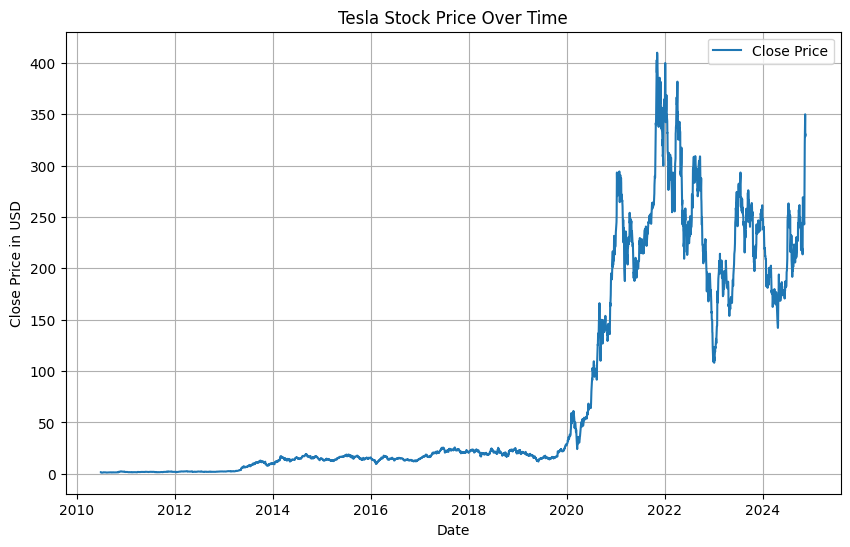

In [20]:
import matplotlib.pyplot as plt

# Función para graficar datos de acciones
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Close Price in USD')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Asegúrate de tener el DataFrame de Tesla
tesla_data.reset_index(inplace=True)  # Si no se ha reiniciado previamente

# Llamar a la función para graficar los datos de Tesla
make_graph(tesla_data, 'Tesla Stock Price Over Time')


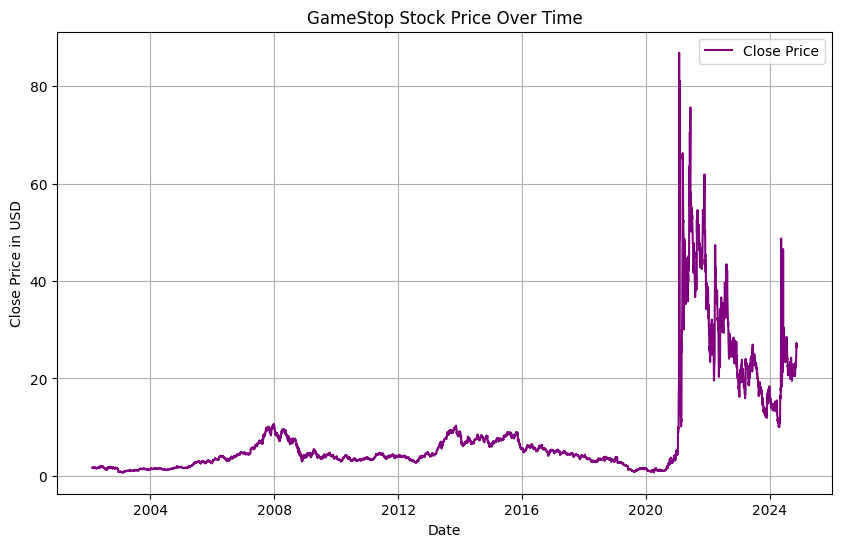

In [21]:
import matplotlib.pyplot as plt

# Definir la función make_graph si no está definida
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price', color='purple')
    plt.xlabel('Date')
    plt.ylabel('Close Price in USD')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Asegúrate de que el DataFrame de GameStop esté preparado
gme_data.reset_index(inplace=True)  # Si no se ha reiniciado el índice previamente

# Llamar a la función para graficar los datos de GameStop
make_graph(gme_data, 'GameStop Stock Price Over Time')
